In [20]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
!pip install -U imbalanced-learn
from collections import Counter

Requirement already up-to-date: imbalanced-learn in e:\program files\anaconda\lib\site-packages (0.6.2)


In [21]:
df = pd.read_csv("data.csv")
df.head()

,Unnamed: 0,Customer ID,Total Quantity,Total Price,Country,Date,Is Back,Purchase Count
0,0,16995,-1,-1.25,United Kingdom,2010-12-02,No,1
1,1,12552,85,13.52,Italy,2011-10-31,Yes,19
2,2,13192,298,15.90,United Kingdom,2011-05-18,Yes,33
3,3,16934,399,8.30,United Kingdom,2011-10-16,No,62
4,4,14976,27,11.90,United Kingdom,2011-01-17,Yes,16


In [22]:
data = df.drop(columns=['Unnamed: 0'])
data.head()

,Customer ID,Total Quantity,Total Price,Country,Date,Is Back,Purchase Count
0,16995,-1,-1.25,United Kingdom,2010-12-02,No,1
1,12552,85,13.52,Italy,2011-10-31,Yes,19
2,13192,298,15.90,United Kingdom,2011-05-18,Yes,33
3,16934,399,8.30,United Kingdom,2011-10-16,No,62
4,14976,27,11.90,United Kingdom,2011-01-17,Yes,16


In [23]:
le = LabelEncoder()

data['Country'] = le.fit_transform(data['Country'])
data['Is Back'] = le.fit_transform(data['Is Back'])

data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Day of Week'] = data['Date'].dt.dayofweek

clean_data = data.drop(columns=['Date'])

clean_data = clean_data[(clean_data['Total Price'] >= 0)]
clean_data = clean_data[(clean_data['Total Quantity'] >= 0)]
clean_data.head()

,Customer ID,Total Quantity,Total Price,Country,Is Back,Purchase Count,Year,Month,Day,Day of Week
1,12552,85,13.52,18,1,19,2011,10,31,0
2,13192,298,15.90,35,1,33,2011,5,18,2
3,16934,399,8.30,35,0,62,2011,10,16,6
4,14976,27,11.90,35,1,16,2011,1,17,0
5,17937,564,204.00,35,1,13,2010,12,12,6


In [24]:
# split dataset in features and target variable
X = clean_data.drop(columns=['Is Back'])  # Features
y = clean_data['Is Back']  # Target variable
print(sorted(Counter(y).items()))
print()
print(X.tail())

[(0, 1345), (1, 2842)]

      Customer ID  Total Quantity  Total Price  Country  Purchase Count  Year  \
4361        15445              58        20.40       35               5  2011   
4362        12371             582         5.04       32              62  2011   
4363        17693             231        15.00       35              16  2011   
4364        18232              57        17.70       35               8  2011   
4365        14962              44        14.85       35               5  2011   

      Month  Day  Day of Week  
4361      3   20            6  
4362     10   11            1  
4363      7   25            0  
4364      5   26            3  
4365      3   14            0  


In [25]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=101)
X_resampled, y_resampled = ros.fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))
print()
print(X_resampled.tail())
print()

# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state =101)
# X_resampled, y_resampled = sm.fit_sample(X, y.ravel())
# print(sorted(Counter(y_resampled).items()))
# print()
# print(X_resampled.tail())
# print()

[(0, 2842), (1, 2842)]

      Customer ID  Total Quantity  Total Price  Country  Purchase Count  Year  \
5679        18222             335        40.56       35              19  2011   
5680        12729             233        25.20       13              25  2011   
5681        16123             170        15.00       35              16  2011   
5682        15554              74        15.90       35              14  2011   
5683        15520             314        10.20       35              18  2011   

      Month  Day  Day of Week  
5679      9    8            3  
5680      8   18            3  
5681     10   19            2  
5682      3    7            0  
5683     12    8            3  



In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, stratify=y_resampled, test_size=0.2, random_state=101)

In [27]:
from sklearn.tree import DecisionTreeClassifier

Text(0, 0.5, 'Error Rate')

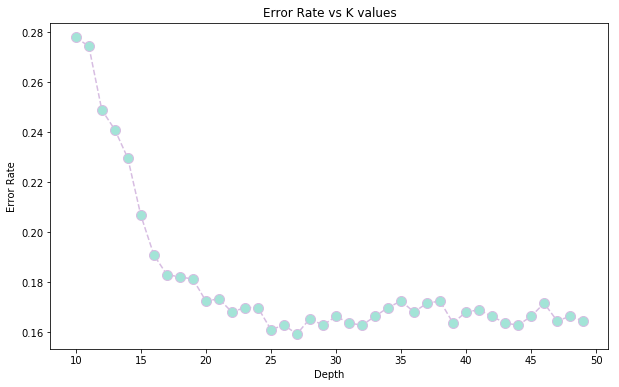

In [49]:
error_rate = []
for i in range(10,50):
    dtree = DecisionTreeClassifier(max_depth=i)
    dtree.fit(X_train, y_train)
    pred_i = dtree.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(10,50), error_rate, color="#D7BDE2", linestyle="dashed", marker='o', markerfacecolor='#A3E4D7', markersize=10)
plt.title('Error Rate vs K values')
plt.xlabel('Depth')
plt.ylabel('Error Rate')

In [50]:
dtree = DecisionTreeClassifier(max_depth = 27)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

In [51]:
from sklearn.metrics import classification_report, confusion_matrix

In [52]:
print(confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

[[554  14]
 [180 389]]

              precision    recall  f1-score   support

           0       0.75      0.98      0.85       568
           1       0.97      0.68      0.80       569

    accuracy                           0.83      1137
   macro avg       0.86      0.83      0.83      1137
weighted avg       0.86      0.83      0.83      1137



In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X_resampled)
data_feat = pd.DataFrame(scaled_features, columns=X_resampled.columns)
print(data_feat.head())
X_scaled = data_feat
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, stratify=y_resampled, test_size=0.2, random_state = 101)

   Customer ID  Total Quantity  Total Price   Country  Purchase Count  \
0    -1.609790       -0.377617    -0.037700 -2.458887       -0.203532   
1    -1.237441        0.130949    -0.035400  0.286824        0.403684   
2     0.939640        0.372100    -0.042745  0.286824        1.661488   
3    -0.199517       -0.516099    -0.039266  0.286824       -0.333650   
4     1.523182        0.766060     0.146399  0.286824       -0.463768   

       Year     Month       Day  Day of Week  
0  0.441157  0.756598  1.945352    -1.404977  
1  0.441157 -0.544141  0.427940    -0.311020  
2  0.441157  0.756598  0.194492     1.876895  
3  0.441157 -1.584733  0.311216    -1.404977  
4 -2.266766  1.276894 -0.272404     1.876895  


In [15]:
from sklearn.neighbors import KNeighborsClassifier

Text(0, 0.5, 'Error Rate')

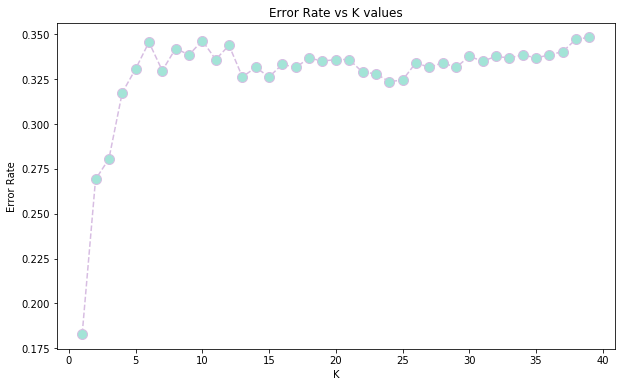

In [33]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color="#D7BDE2", linestyle="dashed", marker='o', markerfacecolor='#A3E4D7', markersize=10)
plt.title('Error Rate vs K values')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [37]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [39]:
print(confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

[[550  18]
 [190 379]]

              precision    recall  f1-score   support

           0       0.74      0.97      0.84       568
           1       0.95      0.67      0.78       569

    accuracy                           0.82      1137
   macro avg       0.85      0.82      0.81      1137
weighted avg       0.85      0.82      0.81      1137



In [40]:
from sklearn.linear_model import LogisticRegression

In [44]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [45]:
print(confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

[[363 205]
 [178 391]]

              precision    recall  f1-score   support

           0       0.67      0.64      0.65       568
           1       0.66      0.69      0.67       569

    accuracy                           0.66      1137
   macro avg       0.66      0.66      0.66      1137
weighted avg       0.66      0.66      0.66      1137



In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

lr = LogisticRegression()
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty, solver=solver)

# Create grid search using 5-fold cross validation
#clf = GridSearchCV(lr, hyperparameters, cv=5)
clf = RandomizedSearchCV(lr, hyperparameters, cv=5)
# Fit grid search
best_model = clf.fit(X_train, y_train)

# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
print('Best Solver:', best_model.best_estimator_.get_params()['solver'])

# Predict target vector
y_pred = best_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

E:\Program Files\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Program Files\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Program Files\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Program Files\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Program Files\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_

Best Penalty: l2
Best C: 21.544346900318832
Best Solver: liblinear
[[363 205]
 [179 390]]

              precision    recall  f1-score   support

           0       0.67      0.64      0.65       568
           1       0.66      0.69      0.67       569

    accuracy                           0.66      1137
   macro avg       0.66      0.66      0.66      1137
weighted avg       0.66      0.66      0.66      1137



E:\Program Files\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Program Files\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
E:\Program Files\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
